In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from scipy.spatial import distance
import random
import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
training_data = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/'
validation_data = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/'
test_data = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test/'

In [4]:
for folder in os.listdir(training_data): 
    files = gb.glob(pathname= str( training_data + folder + '/*.png'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 5000 in folder WithoutMask
For data , found 5000 in folder WithMask


In [5]:
code = {'WithoutMask':0, 'WithMask':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [6]:
size = []
for folder in  os.listdir(training_data) : 
    files = gb.glob(pathname= str( training_data + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (112, 112, 3)
1         (89, 89, 3)
2       (107, 107, 3)
3       (121, 121, 3)
4       (105, 105, 3)
            ...      
9995    (224, 224, 3)
9996    (224, 224, 3)
9997    (224, 224, 3)
9998      (93, 93, 3)
9999    (224, 224, 3)
Length: 10000, dtype: object>

In [7]:
s = 224
X_train = []
y_train = []
for folder in  os.listdir(training_data) : 
    files = gb.glob(pathname= str( training_data + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        info = np.iinfo(image.dtype) # Get the information of the incoming image type
        image = image.astype(np.float64) / info.max # normalize the data to 0 - 1
        image = 255 * image # Now scale by 255
        image = image.astype(np.uint8)
        image_array = cv2.resize(image , (s,s))
        image_array = image_array.astype(np.uint8)
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [8]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in Y_train')

we have 10000 items in X_train
we have 10000 items in Y_train


In [9]:
X_val = []
y_val = []
for folder in  os.listdir(validation_data) : 
    files = gb.glob(pathname= str( validation_data + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        info = np.iinfo(image.dtype) # Get the information of the incoming image type
        image = image.astype(np.float64) / info.max # normalize the data to 0 - 1
        image = 255 * image # Now scale by 255
        image = image.astype(np.uint8)
        image_array = cv2.resize(image , (s,s))
        image_array = image_array.astype(np.uint8)
        X_val.append(list(image_array))
        y_val.append(code[folder])

In [10]:
print(f'we have {len(X_val)} items in X_val')
print(f'we have {len(y_val)} items in y_val')

we have 800 items in X_val
we have 800 items in y_val


In [11]:
X_test = []
y_test = []
for folder in  os.listdir(test_data) : 
    files = gb.glob(pathname= str( test_data + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [12]:
print(f'we have {len(X_test)} items in X_test')
print(f'we have {len(y_test)} items in y_test')

we have 992 items in X_test
we have 992 items in y_test


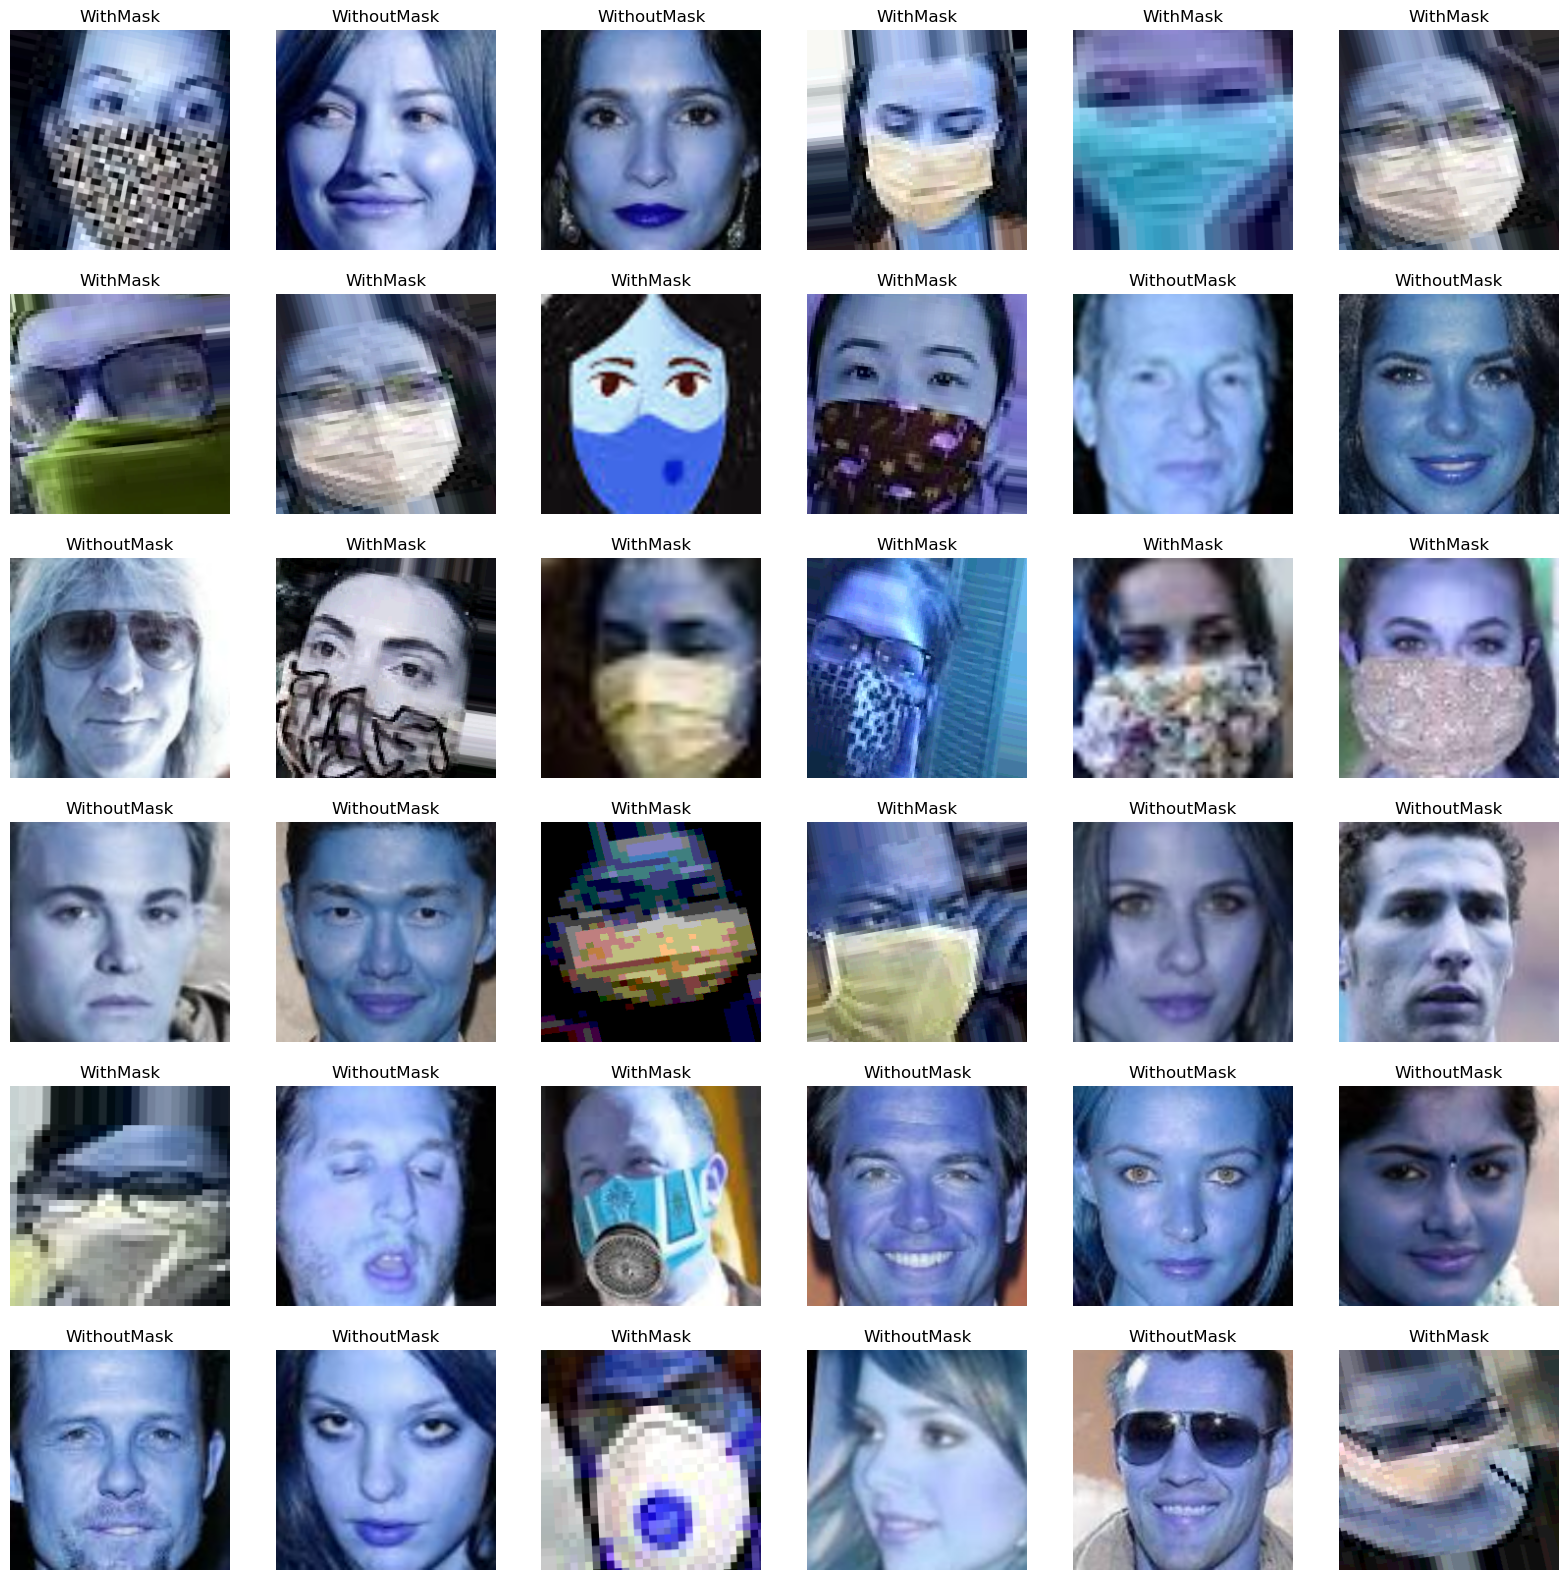

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [14]:
#Training data
temp1 = list(zip(X_train, y_train))
random.shuffle(temp1)
X_train, y_train = zip(*temp1)
X_train, y_train = list(X_train), list(y_train)

X_train = np.array(X_train).astype(np.uint8)
y_train = np.array(y_train).astype(np.uint8)


#Validation data
temp2 = list(zip(X_val, y_val))
random.shuffle(temp2)
X_val, y_val = zip(*temp2)
X_val, y_val = list(X_val), list(y_val)

X_val = np.array(X_val).astype(np.uint8)
y_val = np.array(y_val).astype(np.uint8)


#Test data
temp3 = list(zip(X_test, y_test))
random.shuffle(temp3)
X_test, y_test = zip(*temp3)
X_test, y_test = list(X_test), list(y_test)

X_test = np.array(X_test).astype(np.uint8)
y_test = np.array(y_test).astype(np.uint8)

In [15]:
del temp1
del temp2
del temp3

In [16]:
model = keras.models.Sequential([
        Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        Conv2D(16,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),    
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Flatten() ,    
        Dense(512,activation='relu') ,    
        Dense(512,activation='relu') ,    
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(1,activation='sigmoid') ,    
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val,y_val), verbose=1)

Epoch 1/20
157/157 [==============================] - 37s 133ms/step - loss: 0.1565 - accuracy: 0.9318 - val_loss: 0.0465 - val_accuracy: 0.9837
Epoch 2/20
157/157 [==============================] - 19s 120ms/step - loss: 0.0392 - accuracy: 0.9864 - val_loss: 0.0263 - val_accuracy: 0.9937
Epoch 3/20
157/157 [==============================] - 19s 123ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.0334 - val_accuracy: 0.9862
Epoch 4/20
157/157 [==============================] - 20s 125ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0134 - val_accuracy: 0.9937
Epoch 5/20
157/157 [==============================] - 20s 127ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0102 - val_accuracy: 0.9962
Epoch 6/20
157/157 [==============================] - 20s 126ms/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0209 - val_accuracy: 0.9925
Epoch 7/20
157/157 [==============================] - 19s 124ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0093 - val_ac

In [19]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test,batch_size=64)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

16/16 [==============================] - 1s 34ms/step - loss: 0.0403 - accuracy: 0.9940
Test Loss is 0.04033441096544266
Test Accuracy is 0.9939516186714172


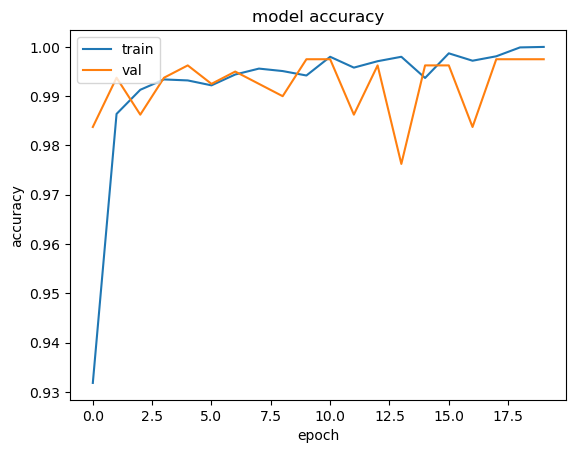

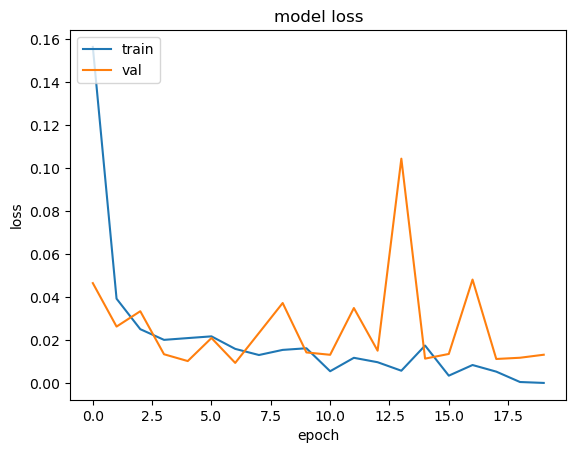

In [20]:
# summarize model for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize model for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
y_pred = model.predict(X_test)
pred = [1 * (x[0]>=0.5) for x in y_pred]

31/31 [==============================] - 1s 17ms/step


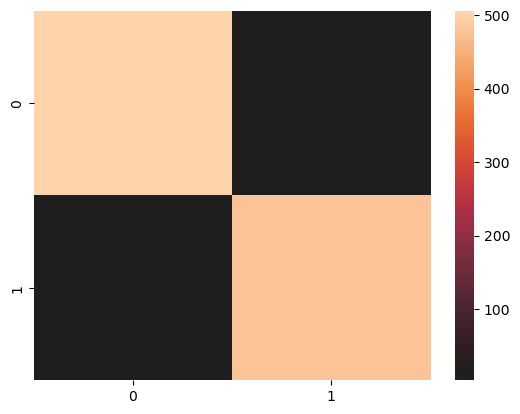

Confusion Matrix is
 [[506   3]
 [  3 480]]


In [80]:
CM = confusion_matrix(y_test, pred)

sns.heatmap(CM, center=True)
plt.show()

print('Confusion Matrix is\n', CM)

In [81]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       509
           1       0.99      0.99      0.99       483

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992

0.9939516129032258
